In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

**Loading Data**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

**Normalize the data**

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

**Neural Network Model**

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   # Flattens input into single flat layer of (28*28)
model.add(tf.keras.layers.Dense(128, activation='relu'))  # REctified Linear Unit
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer. 10 units for 10 digits

**Compile the Model**

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

**Training the Model**

In [6]:
model.fit(x_train,y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2784 - sparse_categorical_accuracy: 0.9144
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1302 - sparse_categorical_accuracy: 0.9617
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1009 - sparse_categorical_accuracy: 0.9711
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9762
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0678 - sparse_categorical_accuracy: 0.9809
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0559 - sparse_categorical_accuracy: 0.9841
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0504 - sparse_categorical_accuracy: 0.9857
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0440 - sparse_categorical_accuracy: 0.9874
Epoch 9/15
1875/1875 [==========

**Saving the Model**

In [7]:
model.save('digrec.model')

INFO:tensorflow:Assets written to: digrec.model\assets


**Running the Model**

In [8]:
model = tf.keras.models.load_model('digrec.model')

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1236 - sparse_categorical_accuracy: 0.9788


1/1 [==============================] - 0s 22ms/step
This digit is probably 5


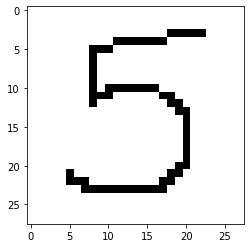

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 17ms/step
This digit is probably 3


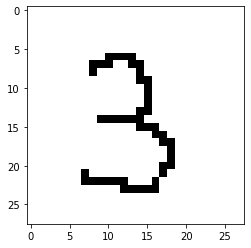

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 15ms/step
This digit is probably 8


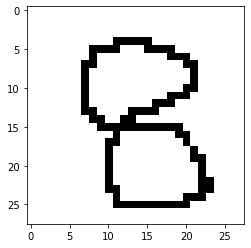

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 24ms/step
This digit is probably 6


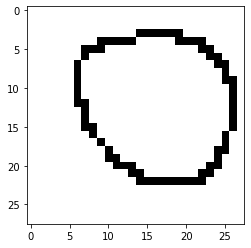

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 15ms/step
This digit is probably 2


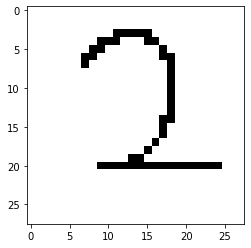

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 33ms/step
This digit is probably 6


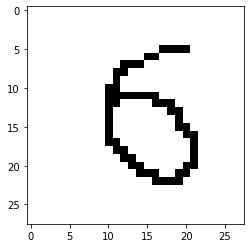

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 18ms/step
This digit is probably 6


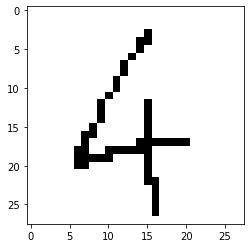

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 17ms/step
This digit is probably 1


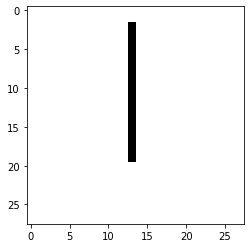

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 15ms/step
This digit is probably 6


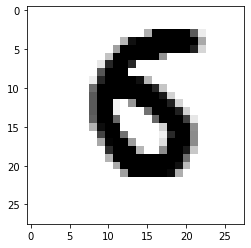

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 42ms/step
This digit is probably 0


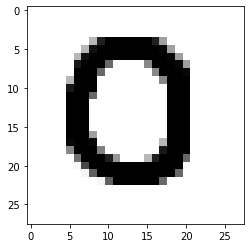

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 15ms/step
This digit is probably 4


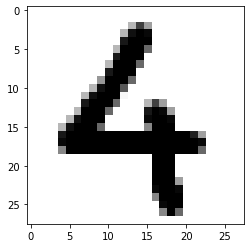

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 1.8315611e-20 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1/1 [==============================] - 0s 15ms/step
This digit is probably 7


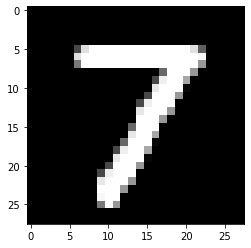

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [17]:
image_number = 1
while os.path.isfile(f"Digits/Digit_{image_number}.png"):
    try:
        img = cv2.imread(f"Digits/Digit_{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        print(prediction)
    except:
        print("Error!")
    finally:
        image_number+=1
        
